# **1. Introduction to Machine Learning with Python**  

Welcome to this hands-on machine learning class! In this session, we’ll focus on **practical implementation** of five fundamental models using Python’s `scikit-learn` library. You’ll learn to code, train, and evaluate models.

## **Learning Objectives**  
By the end of this class, you’ll be able to:  
1. **Implement** all 5 models using `scikit-learn`.  
2. **Preprocess** datasets for regression and classification tasks.  
3. **Evaluate** model performance with metrics like accuracy and mean squared error.  
4. **Adjust** hyperparameters (e.g., tree depth, SVM kernels) to improve results.  


## **Key Models Covered**:  
- **Linear Regression**: Predict numerical values (e.g., house prices).  
- **Logistic Regression**: Classify binary outcomes (e.g., yes/no).  
- **Decision Trees**: Build flowchart-like rules for classification.  
- **Random Forest**: Combine multiple trees for robust predictions.  
- **SVM**: Create boundaries to separate complex data shapes.  


## **Tools You’ll Use**  
- `scikit-learn`: For model training and evaluation.  
- `matplotlib`: To visualize data and decision boundaries.  
-  `pandas`: For loading and preprocessing datasets.  


###  Import the required libraries

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Scikit-learn models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Datasets
from sklearn.datasets import load_iris, make_moons

print("Libraries loaded!")

Libraries loaded!


# **2. Linear Regression**

### **What is Linear Regression?**  
Linear regression models the relationship between a **feature** ($X$) and a **continuous target** ($Y$) by fitting a straight line.  

**Equation**:  
The model assumes:  
$$ Y = \beta_0 + \beta_1 X + \epsilon $$  
- $\beta_0$: Intercept (bias term)  
- $\beta_1$: Slope (weight of feature $X$)  
- $\epsilon$: Error term (noise)  

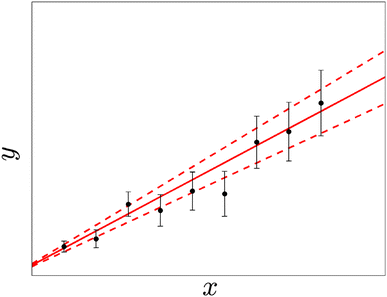

- **Black dots**: observed data points  
- **Red solid line**: best-fit regression line  
- **Red dashed lines**: confidence intervals or error bounds  
- **Black error bars**: measurement uncertainties  

The goal is finding the best-fit line that minimizes errors between predicted and actual data points, typically using Mean Squared Error (MSE).

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$  
where $\hat{y}_i$ is the predicted value.

### Generate data

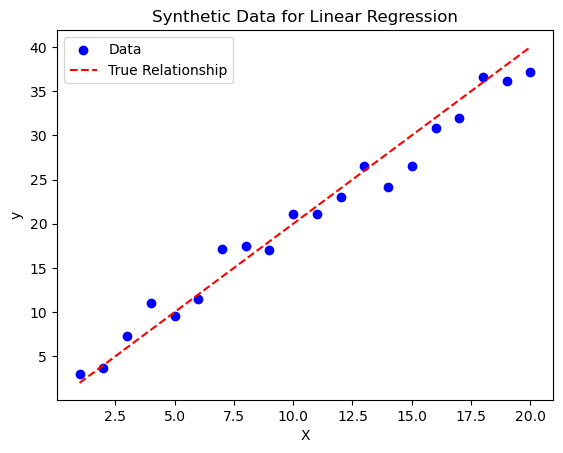

In [3]:
# Generate synthetic data
np.random.seed(42)
X = np.arange(1, 21).reshape(-1, 1)  # Features (1D array)
y = 2 * X.ravel() + np.random.randn(20) * 2  # y = 2x + noise

# Plot
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, 2*X, color='red', linestyle='--', label='True Relationship')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Synthetic Data for Linear Regression")
plt.show()

### Train the model to find $\beta_0$ and $\beta_1$

In [4]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X, y)

# Extract coefficients (β₀ and β₁)
beta_0 = model.intercept_
beta_1 = model.coef_[0]

print(f"Trained Model: y = {beta_0:.2f} + {beta_1:.2f}X")

Trained Model: y = 1.75 + 1.80X


### Visualize the best-fit line 

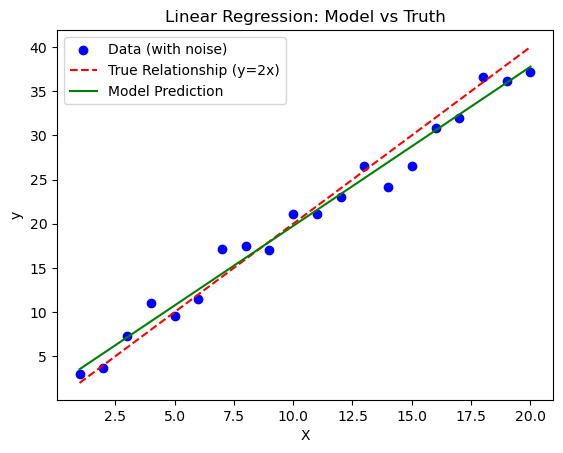

In [5]:
# Plot data, true relationship, and model prediction
plt.scatter(X, y, color='blue', label='Data (with noise)')
plt.plot(X, 2*X, color='red', linestyle='--', label='True Relationship (y=2x)')
plt.plot(X, model.predict(X), color='green', label='Model Prediction')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression: Model vs Truth")
plt.show()

### Make predictions

In [6]:
# Predict for a new X value (e.g., X=21)
new_X = [[21]]
predicted_y = model.predict(new_X)

print(f"Prediction for X={new_X[0][0]}: {predicted_y[0]:.2f}")

Prediction for X=21: 39.57


### **Key Takeaways**  
- The model learns $\beta_0$ (intercept) and $\beta_1$ (slope) automatically from data.  
- Despite noise, the predicted line (green) closely matches the true relationship (red dashes).  
- Use `.predict()` to estimate new values.  

**Experiment**:  
Modify the noise level (`np.random.randn(20) * [value]`) and rerun the code.  

# **2. Logistic Regression**


Logistic Regression is widely used for classification tasks, especially for predicting binary outcomes—situations where there are two possible results. Unlike linear regression, which predicts continuous numbers, logistic regression provides probabilities that a given input belongs to a particular class.

### How it works:

- Logistic Regression maps any input through a special S-shaped function called the **sigmoid function**, ensuring predictions are always between 0 and 1.  
- The resulting value represents the probability that an input belongs to the positive class (for example: "Yes" or "Pass").

### Example Visualization:
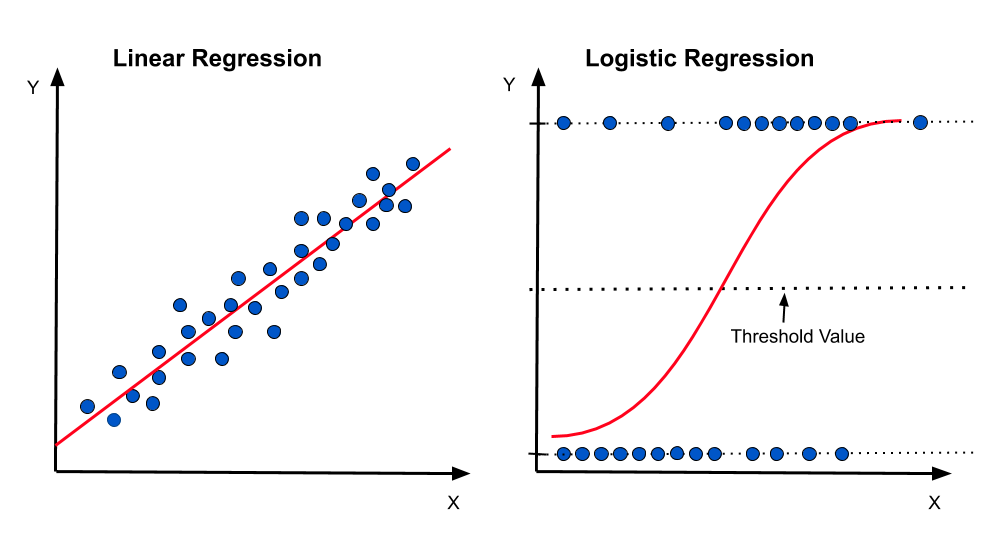

- **Dots**: Data points (belonging to one of two classes).
- **Curve (Sigmoid)**: Represents predicted probabilities.
- **Horizontal Line (at 0.5)**: Decision boundary—above this, predict positive class; below, negative class.

### Advantages:

- Simple and efficient for binary classification.
- Outputs clear probabilities for easy interpretation.


### Load classic Iris dataset for binary classification

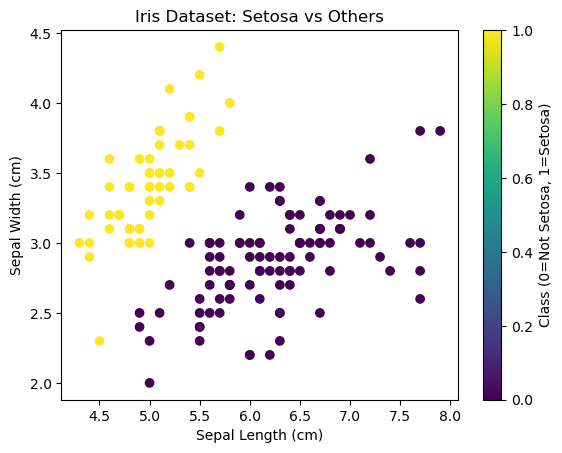

In [7]:
# Load Iris dataset (binary classification: Setosa vs Not-Setosa)
iris = load_iris()
X_iris = iris.data[:, :2]  # Use only first 2 features (sepal length/width)
y_iris = (iris.target == 0).astype(int)  # 1 for Setosa, 0 otherwise

# Plot
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='viridis')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Iris Dataset: Setosa vs Others")
plt.colorbar(label='Class (0=Not Setosa, 1=Setosa)')
plt.show()

### Train a Logistic Regression Model

In [8]:
from sklearn.linear_model import LogisticRegression

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_iris, y_iris)

# Print model parameters
intercept = model.intercept_[0]
coef = model.coef_[0]
print(f"Model intercept: {intercept:.2f}")
print(f"Model coefficients: Sepal Length: {coef[0]:.2f}, Sepal Width: {coef[1]:.2f}")

Model intercept: 8.32
Model coefficients: Sepal Length: -3.39, Sepal Width: 3.16


### Visualize the Decision Boundary

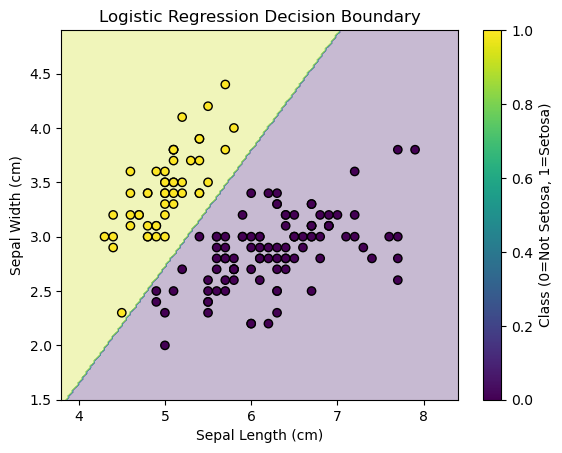

In [9]:
# Define the decision boundary plotting function
x_min, x_max = X_iris[:, 0].min() - 0.5, X_iris[:, 0].max() + 0.5
y_min, y_max = X_iris[:, 1].min() - 0.5, X_iris[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot the decision boundary and original data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, edgecolors='k', cmap='viridis')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Logistic Regression Decision Boundary")
plt.colorbar(label='Class (0=Not Setosa, 1=Setosa)')
plt.show()

### Make Predictions

In [10]:
# Predict class for new data point
new_sample = [[5.0, 3.5]]
pred_prob = model.predict_proba(new_sample)[0, 1]
pred_class = model.predict(new_sample)[0]

print(f"Predicted class: {'Setosa' if pred_class == 1 else 'Not Setosa'}")
print(f"Probability of Setosa: {pred_prob:.2f}")

Predicted class: Setosa
Probability of Setosa: 0.92


# **4. Classification Tree**

Classification trees, a type of **decision tree**, are intuitive models that use a set of straightforward "yes/no" questions to classify data. Each question splits the data into smaller groups, making predictions simpler and easier to interpret.

- Begin at the top (root node) and answer simple questions.
- Follow the branches based on answers until you reach an outcome (leaf node).
- Outcomes at the leaf nodes are your final classification predictions.

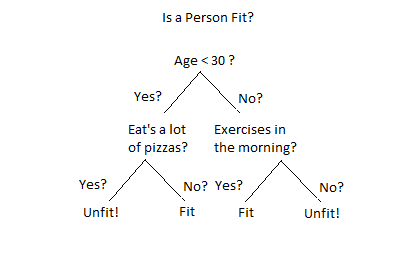

- **Top node**: starts the classification by checking age.
- **Middle nodes**: further refine predictions with follow-up questions (eating habits, exercise).
- **Leaf nodes**: provide the final classification ("Fit" or "Unfit").

### Advantages:

- Highly interpretable and intuitive.
- Can handle both numeric and categorical data effectively.
- Good for visualizing decision-making processes.

### Load Titanic dataset

In [13]:
import pandas as pd

# Load Titanic dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic = pd.read_csv(url)

# Quickly inspect column names
print("Available columns:", titanic.columns.tolist())

# Adjust preprocessing to match dataset columns
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age']]

# Convert 'Sex' to numeric: male=0, female=1
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

# Remove rows with missing values
titanic = titanic.dropna()

# Features and target variable
X_titanic = titanic.drop('Survived', axis=1)
y_titanic = titanic['Survived']

print("Titanic dataset shape:", X_titanic.shape)

Available columns: ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']
Titanic dataset shape: (887, 3)


### Train the Classification Tree

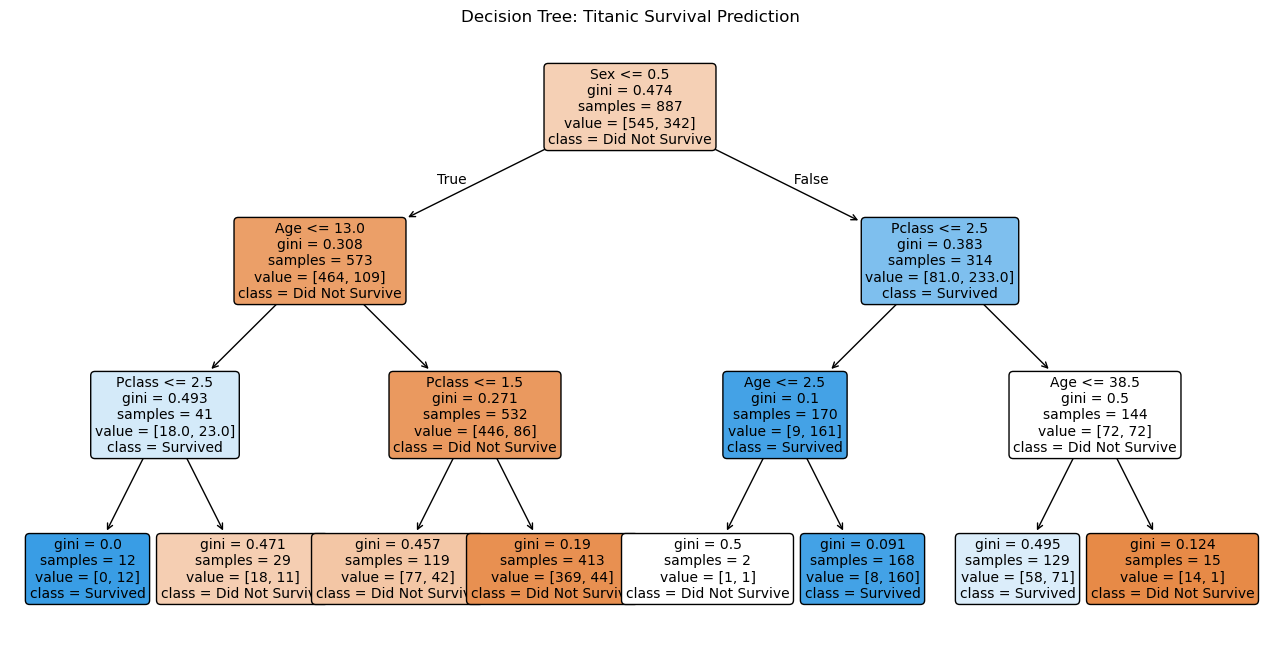

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train a decision tree model
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_titanic, y_titanic)

# Visualize the tree
plt.figure(figsize=(16, 8))
plot_tree(model, feature_names=X_titanic.columns, class_names=['Did Not Survive', 'Survived'],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree: Titanic Survival Prediction")
plt.show()

### Evaluate Model Performance

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

# Retrain model on training set
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test set: {accuracy:.2f}")

Model accuracy on test set: 0.78


### Predict for a New Passenger

In [18]:
# Predict survival for a new passenger
new_passenger = [[1, 1, 25]]  # 1st class, female, age 25

survival_pred = model.predict(new_passenger)[0]
survival_prob = model.predict_proba(new_passenger)[0][1]

print(f"Predicted class: {'Survived' if survival_pred == 1 else 'Did Not Survive'}")
print(f"Probability of Survival: {survival_prob:.2f}")

Predicted class: Survived
Probability of Survival: 0.98


E:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
E:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## **5. Random Forest**  

Random Forest is an ensemble learning method—meaning it builds multiple individual decision trees and merges their results. Think of it as asking multiple experts for their opinions and taking the majority vote (for classification) or average result (for regression).

- It creates several **decision trees**, each trained on random subsets of the data and random subsets of features.
- Each tree independently predicts an outcome.
- For classification, the Random Forest takes a majority vote from all trees to determine the final class.
- For regression, it averages predictions from all the trees.

Because each tree sees slightly different data, random forests reduce the risk of overfitting that often occurs with single trees.

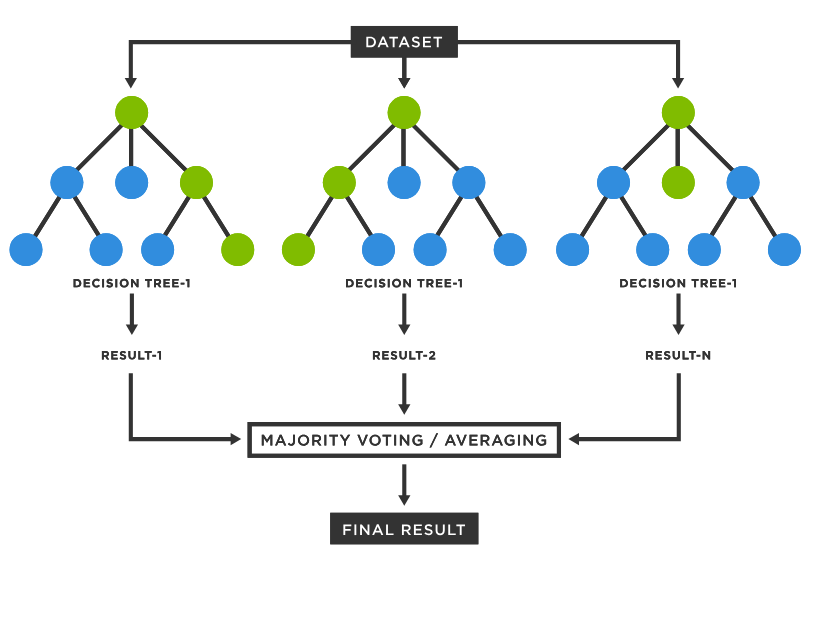
- **Multiple Decision Trees**: Each tree makes independent predictions.
- **Majority Vote or Average**: Aggregating these predictions gives the final robust prediction.

### Advantages:

- Usually provides better accuracy than a single decision tree.
- Robust to noisy data and resistant to overfitting.
- Effective with both large datasets and high-dimensional data.

### Train the Random Forest Model

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

# Initialize and train the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest accuracy on test set: {rf_accuracy:.2f}")

Random Forest accuracy on test set: 0.76


### Feature Importance Visualization

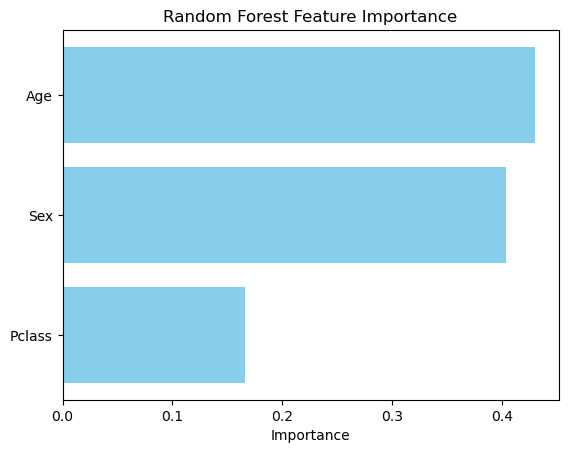

In [20]:
import matplotlib.pyplot as plt

# Plot feature importance
importance = rf_model.feature_importances_
feature_names = X_titanic.columns

plt.barh(feature_names, importance, color='skyblue')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()

### Predict Survival for a New Passenger

In [22]:
# Predict survival for a new passenger
new_passenger = [[2, 1, 25]]  # Pclass=1, Sex=female(1), Age=25

survival_pred = rf_model.predict(new_passenger)[0]
survival_prob = rf_model.predict_proba(new_passenger)[0][1]

print(f"Predicted class: {'Survived' if survival_pred == 1 else 'Did Not Survive'}")
print(f"Probability of Survival: {survival_prob:.2f}")

Predicted class: Survived
Probability of Survival: 0.99


E:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
E:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## **6. Support Vector Machine (SVM) **  

Support Vector Machines (SVMs) are powerful and versatile machine learning models widely used for classification and regression. They're especially effective in solving problems where clear separation between classes might not be obvious at first glance.

- An SVM searches for the optimal decision boundary that best separates classes, maximizing the margin (distance) between the boundary and the closest data points (called support vectors).
- When data isn't clearly separable by a simple straight line, SVM uses kernels (like polynomial or radial basis functions) to map data into higher-dimensional spaces, making separation possible.

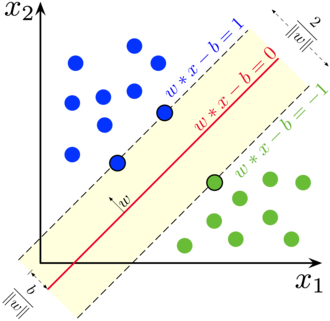

- **Solid line**: The optimal boundary (hyperplane).
- **Dashed lines**: Margins around the boundary—SVM maximizes these margins.
- **Circled points (Support Vectors)**: The points closest to the boundary that determine its position.

### Advantages:

- Effective in high-dimensional spaces.
- Very robust, especially with non-linear data (using kernels).
- Performs well even when clear separation isn't initially visible.

### Non-linear dataset for SVM

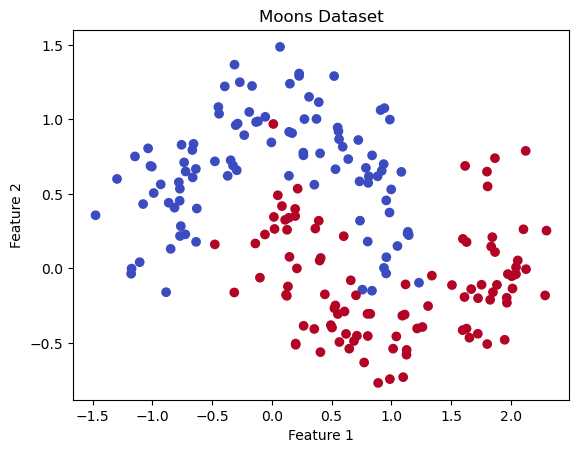

In [23]:
# Generate moons dataset
X_moons, y_moons = make_moons(n_samples=200, noise=0.2, random_state=42)

# Plot
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='coolwarm')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Moons Dataset")
plt.show()

### Train an SVM Model

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.3, random_state=42)

# Train SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Evaluate accuracy
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM accuracy on test set: {accuracy:.2f}")

SVM accuracy on test set: 0.97


### Visualize the Decision Boundary

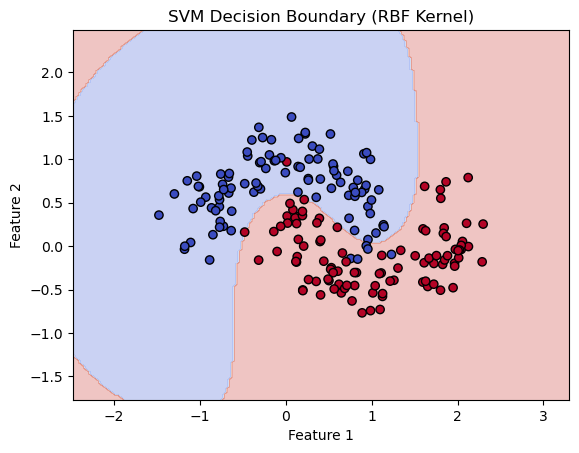

In [26]:
# Define grid
x_min, x_max = X_moons[:, 0].min() - 1, X_moons[:, 0].max() + 1
y_min, y_max = X_moons[:, 1].min() - 1, X_moons[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict over grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='coolwarm', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary (RBF Kernel)")
plt.show()

### Predicting a New Data Point

In [27]:
# Predict new sample
new_point = [[1, 0]]
predicted_class = svm_model.predict(new_point)[0]

print(f"Predicted class for point {new_point[0]}: {predicted_class}")

Predicted class for point [1, 0]: 1
